# Data Exploration - Other venue data

To further explore the relationship between venues/industries in an area and crime, additional information sources have been selected from the London data store

In [3]:
try:
    print("Importing libraries...\n")
    from progressbar import ProgressBar
    from bs4 import BeautifulSoup as bts # library for web scraping
    import numpy as np # library to handle data in a vectorized manner
    import pandas as pd # library for data analysis
    from pandas.io.json import json_normalize
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    import requests # library to handle requests
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import matplotlib as mp # library for visualization
    from sklearn.cluster import KMeans # import k-means from clustering stage
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import folium # map rendering library
    import lxml
    import re
    
    from time import sleep
    
    from matplotlib import pyplot as plt
    from matplotlib.pyplot import figure
    import seaborn as sn
    
    import datetime
    import dateutil
    print("All libraries imported successfully!\n")
except:
    print("ERROR: Could not import all libraries!\n")

%matplotlib inline

Importing libraries...

All libraries imported successfully!



## Borough Data

The additional data sources used record venue/industry information at a London Borough level.  The london data store contains profile data about each borougb

In [4]:
#london borough list
file ='https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv'
boroughsData= pd.read_csv(file, encoding='latin1')
boroughsData.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


This profile contains lots of features, however for the purposes of this analysis the list of boroughs and their population is the data of interest.

In [5]:
#lots of interesting data, but for this just want list of london boroughs and their population
boroughs=pd.DataFrame(columns= ['Borough'])
boroughs['Borough']=boroughsData['Area_name']
boroughs['Population']=boroughsData['GLA_Population_Estimate_2017']
boroughs.set_index('Borough', inplace=True)
boroughs

,Population
Borough,
City of London,8800
Barking and Dagenham,209000
Barnet,389600
Bexley,244300
Brent,332100
Bromley,327900
Camden,242500
Croydon,386500
Ealing,351600


The data also contains aggregate data, these records are not required, so removed to leave a list of boroughs

In [6]:
#not helpful!
boroughs.drop(index=['Inner London','Outer London', 'London', 'England', 'United Kingdom'], axis = 0, inplace=True)
boroughs

,Population
Borough,
City of London,8800
Barking and Dagenham,209000
Barnet,389600
Bexley,244300
Brent,332100
Bromley,327900
Camden,242500
Croydon,386500
Ealing,351600


## Venues with 24 hour alcohol licence

This data has been selected as specific to a venue type, which intuitively may have a connection to crime (for example disorderly behaviour). 

### Data Acquisition

This data will be sourced from: 
    https://data.london.gov.uk/download/alcohol-and-late-night-refreshment-licensing-statistics/7836522b-3b4c-4aae-9aa3-9b2389621a96/licensed-premises-24-hour.xlsx
Data is provided on an annual basis, with the most recent data being from 2018.  Propose to use 2018 data with 2017 data used to fill in gaps

In [7]:
file = 'https://data.london.gov.uk/download/alcohol-and-late-night-refreshment-licensing-statistics/7836522b-3b4c-4aae-9aa3-9b2389621a96/licensed-premises-24-hour.xlsx'
allNightLicense = pd.read_excel(file, sheet_name='2018', header=2, engine='openpyxl')
allNightLicense.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Total,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total.1,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Unnamed: 11,Unnamed: 12
0,Barking and Dagenham,:,:,3,1,2,0,:,0,:,:,0,:
1,Barnet,:,:,:,:,:,:,:,:,:,:,:,:
2,Bexley,4,0,4,1,3,0,0,0,0,0,0,0
3,Brent,46,2,28,4,24,0,3,3,0,0,13,0
4,Bromley,14,0,11,4,7,0,3,0,3,0,0,0


### Data Cleansing

The excel spreadsheet has some column headers in merged cells, these headings have not been automatically captured so manually add back.

In [8]:
venueCols= ['Total', 'Pubs, bars and nightclubs','Total Supermarkets and stores','Large supermarkets','Other convenience stores','Supermarket and store type not reported', 'Total Hotel bars', 'Open 24 hours to residents and general public', 'Open 24 hours to residents and their guests only', 'Hotel bar type not reported', 
               'Other premises types', 'Premises type not reported']
columnNames = ['Borough'] + venueCols
allNightLicense.columns=columnNames
allNightLicense.head()

,Borough,Total,"Pubs, bars and nightclubs",Total Supermarkets and stores,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total Hotel bars,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Other premises types,Premises type not reported
0,Barking and Dagenham,:,:,3,1,2,0,:,0,:,:,0,:
1,Barnet,:,:,:,:,:,:,:,:,:,:,:,:
2,Bexley,4,0,4,1,3,0,0,0,0,0,0,0
3,Brent,46,2,28,4,24,0,3,3,0,0,13,0
4,Bromley,14,0,11,4,7,0,3,0,3,0,0,0


There are a number of gaps in the data (shown as :), where that data was not avaialble.  For this analysis, use the previous years' value if available.

In [9]:
file = 'https://data.london.gov.uk/download/alcohol-and-late-night-refreshment-licensing-statistics/7836522b-3b4c-4aae-9aa3-9b2389621a96/licensed-premises-24-hour.xlsx'
allNightLicensePrev = pd.read_excel(file, sheet_name='2017', header=2, engine='openpyxl')
allNightLicensePrev.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Total,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total.1,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Unnamed: 11,Unnamed: 12
0,Barking and Dagenham,1,0,1,0,1,0,0,0,0,0,:,0
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,0
2,Bexley,7,0,1,1,0,0,4,0,4,0,2,0
3,Brent,51,3,34,8,26,0,3,3,0,0,11,0
4,Bromley,11,0,8,3,5,0,2,0,2,0,1,0


In [10]:
allNightLicensePrev.columns=columnNames #set column names 

For both datasets, set the index to be the borough

In [11]:
allNightLicensePrev.set_index('Borough', inplace=True)
allNightLicense.set_index('Borough', inplace=True)

In [12]:
allNightLicense.head()

,Total,"Pubs, bars and nightclubs",Total Supermarkets and stores,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total Hotel bars,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Other premises types,Premises type not reported
Borough,,,,,,,,,,,,
Barking and Dagenham,:,:,3,1,2,0,:,0,:,:,0,:
Barnet,:,:,:,:,:,:,:,:,:,:,:,:
Bexley,4,0,4,1,3,0,0,0,0,0,0,0
Brent,46,2,28,4,24,0,3,3,0,0,13,0
Bromley,14,0,11,4,7,0,3,0,3,0,0,0


In [13]:
allNightLicensePrev.head()

,Total,"Pubs, bars and nightclubs",Total Supermarkets and stores,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total Hotel bars,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Other premises types,Premises type not reported
Borough,,,,,,,,,,,,
Barking and Dagenham,1,0,1,0,1,0,0,0,0,0,:,0
Barnet,0,0,0,0,0,0,0,0,0,0,0,0
Bexley,7,0,1,1,0,0,4,0,4,0,2,0
Brent,51,3,34,8,26,0,3,3,0,0,11,0
Bromley,11,0,8,3,5,0,2,0,2,0,1,0


Examine each cell in the 2018 dataset, and if the value is ":" then replace with the value from 2017. Create a list of the boroughs where data cleansing has occured for manual inspection.

In [14]:
cleanedBoroughs = []
for index, row in allNightLicense.iterrows():
    for col in allNightLicense.columns:
        if row[col]==':':
            allNightLicense.loc[index, col]=allNightLicensePrev.loc[index, col]
            print('using 2017 value {} for {} in column {}'.format(allNightLicensePrev.loc[index, col], index,col))
            if index not in cleanedBoroughs: 
                cleanedBoroughs = cleanedBoroughs + [index]
                
print('data cleaned replacing missing values with previous years')


using 2017 value 1 for Barking and Dagenham in column Total
using 2017 value 0 for Barking and Dagenham in column Pubs, bars and nightclubs
using 2017 value 0 for Barking and Dagenham in column Total Hotel bars
using 2017 value 0 for Barking and Dagenham in column Open 24 hours to residents and their guests only
using 2017 value 0 for Barking and Dagenham in column Hotel bar type not reported
using 2017 value 0 for Barking and Dagenham in column Premises type not reported
using 2017 value 0 for Barnet in column Total
using 2017 value 0 for Barnet in column Pubs, bars and nightclubs
using 2017 value 0 for Barnet in column Total Supermarkets and stores
using 2017 value 0 for Barnet in column Large supermarkets
using 2017 value 0 for Barnet in column Other convenience stores
using 2017 value 0 for Barnet in column Supermarket and store type not reported
using 2017 value 0 for Barnet in column Total Hotel bars
using 2017 value 0 for Barnet in column Open 24 hours to residents and general p

Manually inspect the list of boroughs where data cleansing has occured. Of particular note, the dataset contains totals and sub totals, ensure these still make sense with the amended data.

In [15]:
#manually inspect that totals make sense in cleaned data
allNightLicense.loc[cleanedBoroughs]

,Total,"Pubs, bars and nightclubs",Total Supermarkets and stores,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total Hotel bars,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Other premises types,Premises type not reported
Borough,,,,,,,,,,,,
Barking and Dagenham,1,0,3,1,2,0,0,0,0,0,0,0
Barnet,0,0,0,0,0,0,0,0,0,0,0,0
Camden,9,0,0,0,0,0,9,0,9,0,0,0
Southwark,:,:,:,:,:,:,:,:,:,:,:,:


The total for Barking and Dagenham does not now reflect the constituent data, update this value

In [16]:
#barking total does not make sense
allNightLicense.loc['Barking and Dagenham', 'Total']=3

Since Southwark data is missing for 2 consecutive years it will not be considered in this exercise

In [17]:
allNightLicense.drop(index='Southwark', axis=0, inplace=True) # 0 for row

Look at entire dataset

In [18]:
allNightLicense

,Total,"Pubs, bars and nightclubs",Total Supermarkets and stores,Large supermarkets,Other convenience stores,Supermarket and store type not reported,Total Hotel bars,Open 24 hours to residents and general public,Open 24 hours to residents and their guests only,Hotel bar type not reported,Other premises types,Premises type not reported
Borough,,,,,,,,,,,,
Barking and Dagenham,3,0,3,1,2,0,0,0,0,0,0,0
Barnet,0,0,0,0,0,0,0,0,0,0,0,0
Bexley,4,0,4,1,3,0,0,0,0,0,0,0
Brent,46,2,28,4,24,0,3,3,0,0,13,0
Bromley,14,0,11,4,7,0,3,0,3,0,0,0
Camden,9,0,0,0,0,0,9,0,9,0,0,0
City of London,17,2,1,0,1,0,5,2,3,0,9,0
Croydon,24,0,6,3,3,0,18,4,14,0,0,0
Ealing,25,0,6,4,2,0,5,4,1,0,14,0


Remove the blank row read from the spreadsheet (showing as row of NaN)

In [19]:

allNightLicense.drop(index=np.NaN, axis=0, inplace=True)


Data contains inner and middle temple which are not London Boroughs, drop these

In [20]:
allNightLicense.drop(index='Inner Temple', axis=0, inplace=True)
allNightLicense.drop(index='Middle Temple', axis=0, inplace=True)


Check list of boroughs

In [21]:
allNightLicense['Total']

Borough
Barking and Dagenham        3
Barnet                      0
Bexley                      4
Brent                      46
Bromley                    14
Camden                      9
City of London             17
Croydon                    24
Ealing                     25
Enfield                    62
Greenwich                  30
Hackney                    34
Hammersmith and Fulham     13
Haringey                   48
Harrow                     10
Havering                   10
Hillingdon                 53
Hounslow                   36
Islington                  54
Kensington and Chelsea     44
Kingston upon Thames        7
Lambeth                    89
Lewisham                   38
Merton                     19
Newham                     32
Redbridge                   9
Richmond upon Thames       32
Sutton                      3
Tower Hamlets              59
Waltham Forest             27
Wandsworth                 24
Westminster               219
Name: Total, dtype: object

A lot of columns are zero for a number of boroughs - this will limit meaningful analysis so remove these. Set tolerance of 8 zeros.   

In [22]:

allNightLicense = allNightLicense[allNightLicense.columns[(allNightLicense==0).sum()<=8]]

allNightLicense.head()

,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,
Barking and Dagenham,3,3,1,2,0,0
Barnet,0,0,0,0,0,0
Bexley,4,4,1,3,0,0
Brent,46,28,4,24,3,0
Bromley,14,11,4,7,3,3


### Data Transformation

In line with crime analysis consider the total number of venues per 10,000 captia

In [24]:
adjAllNightLicense =allNightLicense.merge(boroughs, left_index = True, right_index=True)

for col in adjAllNightLicense.columns:
    adjAllNightLicense[col]= pd.to_numeric(adjAllNightLicense[col], downcast="float") #to conduct correlation analysis column must be numeric type
    adjAllNightLicense[col] = 10000 *adjAllNightLicense[col]/adjAllNightLicense['Population']

adjAllNightLicense.drop(['Population'], axis=1, inplace=True)
adjAllNightLicense.head()

,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,
Barking and Dagenham,0.143541,0.143541,0.047847,0.095694,0.000000,0.000000
Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bexley,0.163733,0.163733,0.040933,0.122800,0.000000,0.000000
Brent,1.385125,0.843120,0.120446,0.722674,0.090334,0.000000
Bromley,0.426959,0.335468,0.121988,0.213480,0.091491,0.091491


Save data for use in other analysis

In [25]:
adjAllNightLicense.to_csv('PopAdj24hourLicense.csv')
allNightLicense.to_csv('24hourLicense.csv')

### Exploratory Data Analysis

Examine total number of 24 hour venues per Borough

Text(0, 0.5, 'London Borough')

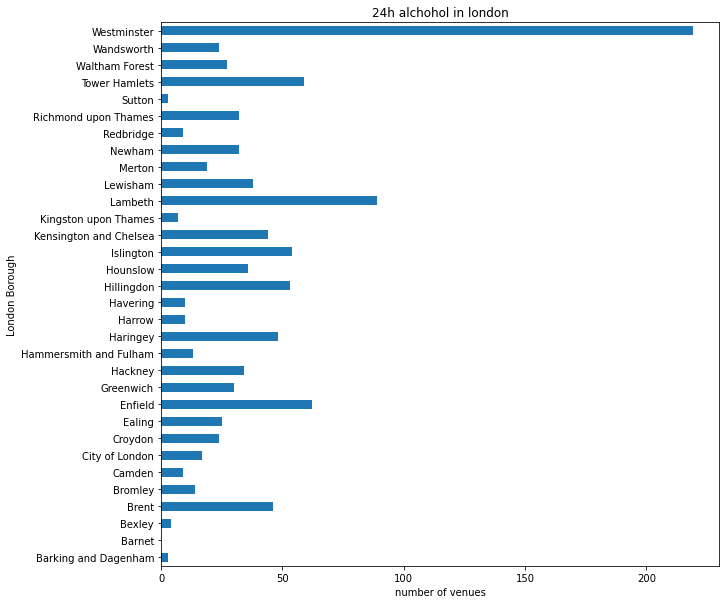

In [27]:

plt.rcParams["figure.figsize"] = (10,10)
allNightLicense['Total'].plot(kind='barh', stacked=True)
plt.title("24h alchohol in london")
plt.xlabel("number of venues")
plt.ylabel("London Borough")

Examine total number of 24 hour venues per Borough population adjusted

Text(0, 0.5, 'London Borough')

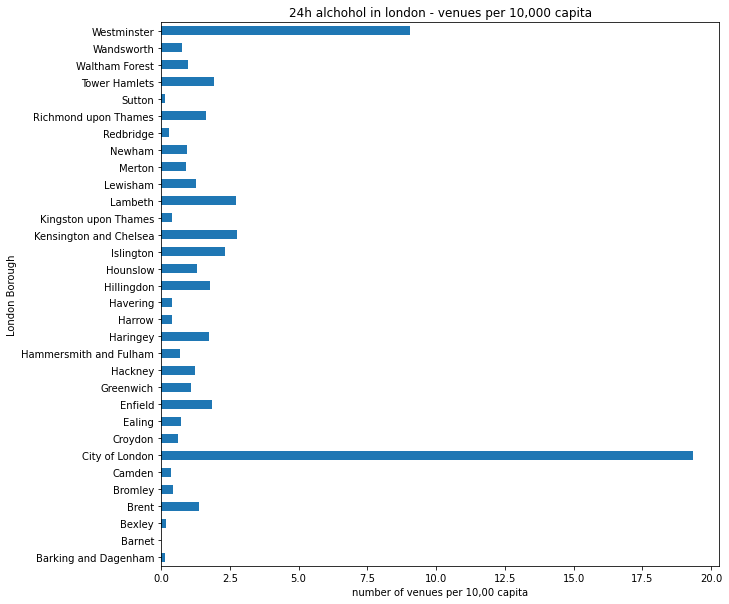

In [29]:
# reset index????? allNightLicense['Borough'] = allNightLicense.index
plt.rcParams["figure.figsize"] = (10,10)
adjAllNightLicense['Total'].plot(kind='barh')
plt.title("24h alchohol in london - venues per 10,000 capita")
plt.xlabel("number of venues per 10,00 capita")
plt.ylabel("London Borough")

**Observation:** This shows City of London and Westminster are both outliers, which fits with knowledge that these are primarily non residential areas. Therefore analysis may be more meaningful with these excluded.

## Businesses in the Borough - Local Units

The London datastore includes information about the industry sector of businesses in the borough.  This can be used to examine if there is any correlation to the crime profile of the borough.

This data is from 2019.

### Data Acquisition

In [30]:
file='https://data.london.gov.uk/download/local-units-broad-industry-group-borough/0ab4932e-d0ea-4863-9bbc-b4de1cf285b4/local-units-by-broad-industry-group.xls'

#issues with corupt/old format file, saved locally opened, converted format and resaved
file = 'C:\\Users\\aerfc\\Downloads\\local-units-by-broad-industry-group.xlsx'
localUnits = pd.read_excel(file, sheet_name='2019 ', header=2, engine='openpyxl')

localUnits.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,E09000001,City of London,25.0,835.0,785.0,30.0,640.0,1425.0,290.0,1280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,10.0,335.0,1645.0,225.0,405.0,710.0,620.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000003,Barnet,35.0,610.0,3385.0,360.0,1205.0,2400.0,635.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E09000004,Bexley,10.0,450.0,1980.0,270.0,330.0,815.0,405.0,580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E09000005,Brent,5.0,575.0,2400.0,405.0,955.0,1895.0,690.0,935.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleansing

THe data loaded has additional blank columns, these must be removed.

In [31]:
#only expecting 20 columns of data
for i in range(20,38):
    localUnits.drop('Unnamed: '+str(i), axis=1, inplace=True)
 
localUnits.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,E09000001,City of London,25.0,835.0,785.0,30.0,640.0,1425.0,290.0,1280.0,2415.0,3700.0,1095.0,8040.0,5225.0,55.0,215.0,335.0,1070.0,27460.0
1,E09000002,Barking and Dagenham,10.0,335.0,1645.0,225.0,405.0,710.0,620.0,430.0,665.0,90.0,140.0,790.0,790.0,170.0,195.0,495.0,380.0,8095.0
2,E09000003,Barnet,35.0,610.0,3385.0,360.0,1205.0,2400.0,635.0,1000.0,2690.0,535.0,2145.0,4955.0,2270.0,55.0,540.0,1230.0,1610.0,25660.0
3,E09000004,Bexley,10.0,450.0,1980.0,270.0,330.0,815.0,405.0,580.0,1090.0,185.0,225.0,1490.0,855.0,25.0,230.0,490.0,555.0,9985.0
4,E09000005,Brent,5.0,575.0,2400.0,405.0,955.0,1895.0,690.0,935.0,1900.0,270.0,775.0,2650.0,1375.0,65.0,315.0,745.0,1035.0,16990.0


The column names are missing so add these

In [33]:
# add column names 
column_names  = ['location code', 'Borough', 'SIC07: 01-03 : Agriculture, forestry & fishing', 'SIC07: 05-39 : Production', 'SIC07: 41-43 : Construction', 'SIC07: 45 : Motor trades', 
                 'SIC07: 46 : Wholesale', 'SIC07: 47 : Retail', 'SIC07: 49-53 : Transport & Storage (inc. postal)', 'SIC07: 55-56 : Accommodation & food services', 
                 'SIC07: 58-63 : Information & communication', 'SIC07: 64-66 : Finance & insurance', 'SIC07: 68 : Property', 'SIC07: 69-75 : Professional, scientific & technical', 
                 'SIC07: 77-82 : Business administration & support services', 'SIC07: 84 : Public administration & defence', 'SIC07: 85 : Education', 'SIC07: 86-88 : Health', 
                 'SIC07: 90-99 : Arts, entertainment, recreation & other services', 'SIC07: Total']
localUnits.columns = column_names
localUnits

,location code,Borough,"SIC07: 01-03 : Agriculture, forestry & fishing",SIC07: 05-39 : Production,SIC07: 41-43 : Construction,SIC07: 45 : Motor trades,SIC07: 46 : Wholesale,SIC07: 47 : Retail,SIC07: 49-53 : Transport & Storage (inc. postal),SIC07: 55-56 : Accommodation & food services,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
0,E09000001,City of London,25.0,835.0,785.0,30.0,640.0,1425.0,290.0,1280.0,2415.0,3700.0,1095.0,8040.0,5225.0,55.0,215.0,335.0,1070.0,27460.0
1,E09000002,Barking and Dagenham,10.0,335.0,1645.0,225.0,405.0,710.0,620.0,430.0,665.0,90.0,140.0,790.0,790.0,170.0,195.0,495.0,380.0,8095.0
2,E09000003,Barnet,35.0,610.0,3385.0,360.0,1205.0,2400.0,635.0,1000.0,2690.0,535.0,2145.0,4955.0,2270.0,55.0,540.0,1230.0,1610.0,25660.0
3,E09000004,Bexley,10.0,450.0,1980.0,270.0,330.0,815.0,405.0,580.0,1090.0,185.0,225.0,1490.0,855.0,25.0,230.0,490.0,555.0,9985.0
4,E09000005,Brent,5.0,575.0,2400.0,405.0,955.0,1895.0,690.0,935.0,1900.0,270.0,775.0,2650.0,1375.0,65.0,315.0,745.0,1035.0,16990.0
5,E09000006,Bromley,65.0,475.0,2465.0,265.0,505.0,1570.0,330.0,855.0,2150.0,385.0,520.0,3505.0,1620.0,25.0,385.0,840.0,1205.0,17165.0
6,E09000007,Camden,35.0,1195.0,1590.0,165.0,1285.0,2885.0,510.0,2170.0,4990.0,855.0,1585.0,10310.0,3520.0,115.0,725.0,1180.0,2925.0,36040.0
7,E09000008,Croydon,20.0,530.0,2335.0,395.0,575.0,1615.0,510.0,1015.0,2095.0,340.0,550.0,2920.0,1485.0,55.0,415.0,990.0,1015.0,16860.0
8,E09000009,Ealing,20.0,735.0,2500.0,430.0,1185.0,1895.0,845.0,1010.0,2450.0,285.0,750.0,3330.0,1680.0,30.0,385.0,815.0,1215.0,19560.0
9,E09000010,Enfield,30.0,550.0,2330.0,375.0,785.0,1305.0,635.0,745.0,1340.0,240.0,675.0,2305.0,1320.0,25.0,325.0,770.0,935.0,14690.0


The Borough name is an adequate and meaningful unique identifier of records, so set this to index, and drop the location code

In [34]:
localUnits.drop('location code', axis = 1, inplace=True)
localUnits.set_index('Borough', inplace=True)


Additional UK regional data is included in the dataset, remove these rows - only London Borough data is required

In [35]:

localUnits = localUnits[0:33]
localUnits

,"SIC07: 01-03 : Agriculture, forestry & fishing",SIC07: 05-39 : Production,SIC07: 41-43 : Construction,SIC07: 45 : Motor trades,SIC07: 46 : Wholesale,SIC07: 47 : Retail,SIC07: 49-53 : Transport & Storage (inc. postal),SIC07: 55-56 : Accommodation & food services,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Borough,,,,,,,,,,,,,,,,,,
City of London,25.0,835.0,785.0,30.0,640.0,1425.0,290.0,1280.0,2415.0,3700.0,1095.0,8040.0,5225.0,55.0,215.0,335.0,1070.0,27460.0
Barking and Dagenham,10.0,335.0,1645.0,225.0,405.0,710.0,620.0,430.0,665.0,90.0,140.0,790.0,790.0,170.0,195.0,495.0,380.0,8095.0
Barnet,35.0,610.0,3385.0,360.0,1205.0,2400.0,635.0,1000.0,2690.0,535.0,2145.0,4955.0,2270.0,55.0,540.0,1230.0,1610.0,25660.0
Bexley,10.0,450.0,1980.0,270.0,330.0,815.0,405.0,580.0,1090.0,185.0,225.0,1490.0,855.0,25.0,230.0,490.0,555.0,9985.0
Brent,5.0,575.0,2400.0,405.0,955.0,1895.0,690.0,935.0,1900.0,270.0,775.0,2650.0,1375.0,65.0,315.0,745.0,1035.0,16990.0
Bromley,65.0,475.0,2465.0,265.0,505.0,1570.0,330.0,855.0,2150.0,385.0,520.0,3505.0,1620.0,25.0,385.0,840.0,1205.0,17165.0
Camden,35.0,1195.0,1590.0,165.0,1285.0,2885.0,510.0,2170.0,4990.0,855.0,1585.0,10310.0,3520.0,115.0,725.0,1180.0,2925.0,36040.0
Croydon,20.0,530.0,2335.0,395.0,575.0,1615.0,510.0,1015.0,2095.0,340.0,550.0,2920.0,1485.0,55.0,415.0,990.0,1015.0,16860.0
Ealing,20.0,735.0,2500.0,430.0,1185.0,1895.0,845.0,1010.0,2450.0,285.0,750.0,3330.0,1680.0,30.0,385.0,815.0,1215.0,19560.0


### Data Transformation

Create population adjusted data

In [36]:
adjLocalUnits =localUnits.merge(boroughs, left_index = True, right_index=True)

for col in adjLocalUnits.columns:
    adjLocalUnits[col]= pd.to_numeric(adjLocalUnits[col], downcast="float") #to conduct correlation analysis column must be numeric type
    adjLocalUnits[col] = 10000 *adjLocalUnits[col]/adjLocalUnits['Population']

adjLocalUnits.drop(['Population'], axis=1, inplace=True)
adjLocalUnits.head()

,"SIC07: 01-03 : Agriculture, forestry & fishing",SIC07: 05-39 : Production,SIC07: 41-43 : Construction,SIC07: 45 : Motor trades,SIC07: 46 : Wholesale,SIC07: 47 : Retail,SIC07: 49-53 : Transport & Storage (inc. postal),SIC07: 55-56 : Accommodation & food services,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Borough,,,,,,,,,,,,,,,,,,
City of London,28.409091,948.863636,892.045455,34.090909,727.272727,1619.318182,329.545455,1454.545455,2744.318182,4204.545455,1244.318182,9136.363636,5937.500000,62.500000,244.318182,380.681818,1215.909091,31204.545455
Barking and Dagenham,0.478469,16.028708,78.708134,10.765550,19.377990,33.971292,29.665072,20.574163,31.818182,4.306220,6.698565,37.799043,37.799043,8.133971,9.330144,23.684211,18.181818,387.320574
Barnet,0.898357,15.657084,86.883984,9.240246,30.929158,61.601643,16.298768,25.667351,69.045175,13.732033,55.056468,127.181725,58.264887,1.411704,13.860370,31.570842,41.324435,658.624230
Bexley,0.409333,18.419975,81.047892,11.051985,13.507982,33.360622,16.577978,23.741302,44.617274,7.572657,9.209988,60.990585,34.997953,1.023332,9.414654,20.057307,22.717970,408.718788
Brent,0.150557,17.314062,72.267389,12.195122,28.756399,57.061126,20.776874,28.154170,57.211683,8.130081,23.336344,79.795242,41.403192,1.957242,9.485095,22.433002,31.165312,511.592894


Save data for use in later analysis

In [37]:
adjLocalUnits.to_csv('PopAdjLocalUnits.csv')
localUnits.to_csv('LocalUnits.csv')

### Data Exploration

Distribution of financial services

Text(0, 0.5, 'London Borough')

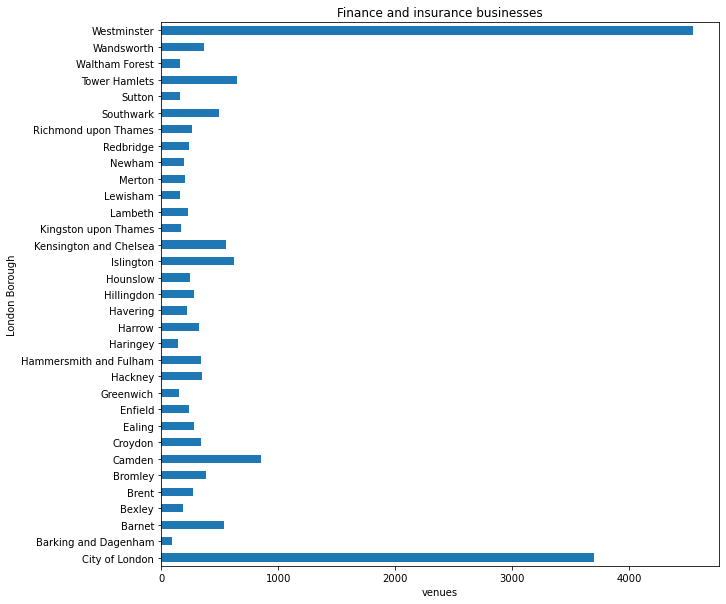

In [169]:
#sanity check where is finance located?


plt.rcParams["figure.figsize"] = (10,10)
localUnits['SIC07: 64-66 : Finance & insurance'].plot(kind='barh', stacked=True) #stacked irrelevant here
plt.title("Finance and insurance businesses")
plt.xlabel("venues")
plt.ylabel("London Borough")

As expected this showa most finance and insurace is in the city of London or Westminster

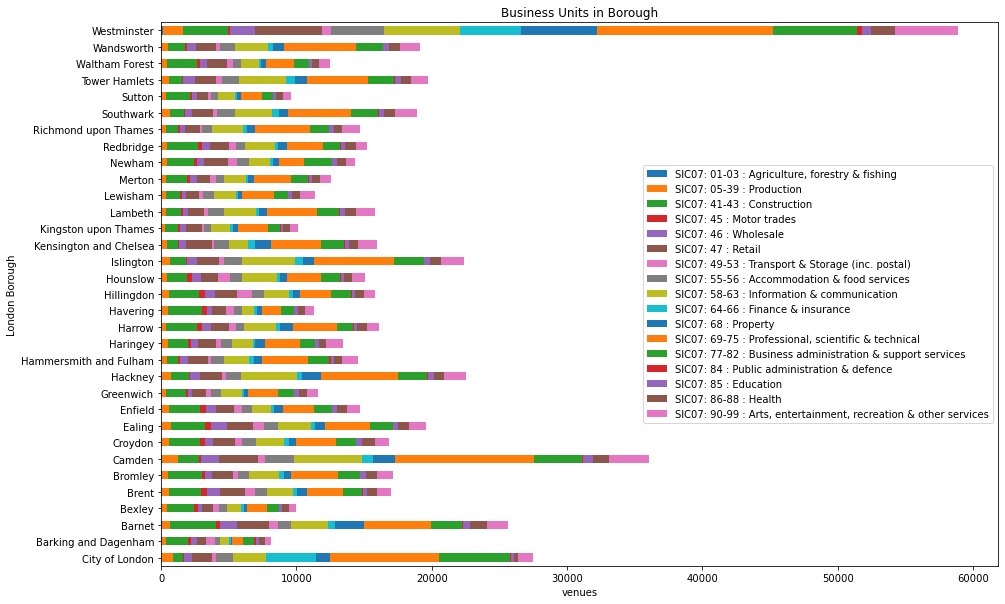

In [42]:
plotData=localUnits.drop('SIC07: Total', axis=1)
plt.rcParams["figure.figsize"] = (15,10)
plotData.plot(kind='barh', stacked=True) #stacked irrelevant here
plt.title("Business Units in Borough")
plt.xlabel("venues")
plt.ylabel("London Borough")
plt.legend()

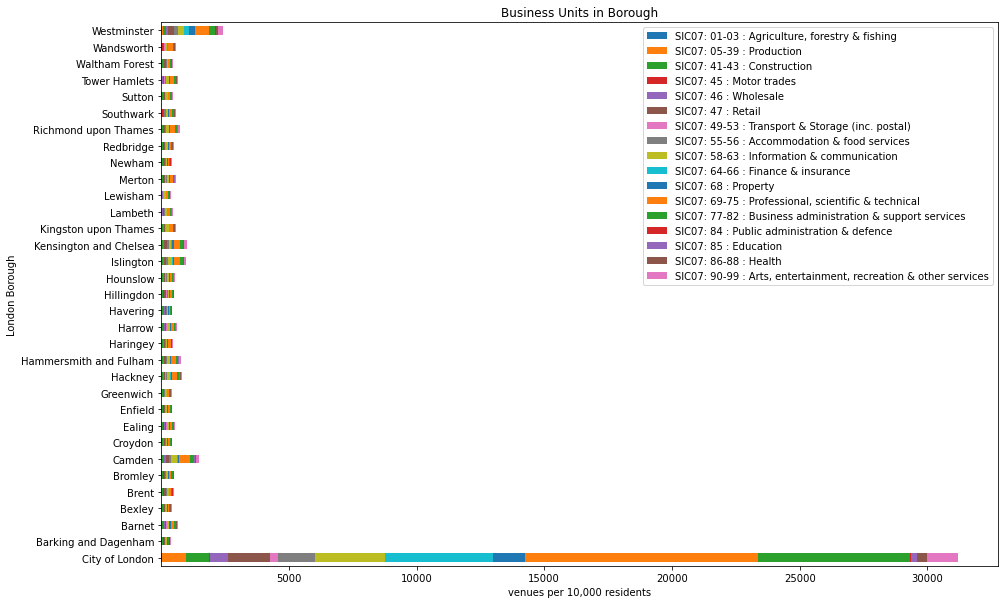

In [44]:
plotData=adjLocalUnits.drop('SIC07: Total', axis=1)
plt.rcParams["figure.figsize"] = (15,10)
plotData.plot(kind='barh', stacked=True) #stacked irrelevant here
plt.title("Business Units in Borough")
plt.xlabel("venues per 10,000 residents")
plt.ylabel("London Borough")
plt.legend()

**Observation: ** The City of London, and to an extent Westminster have a disproportionate number of businesses relative to  population

Look at data excluding city of London an Westminster

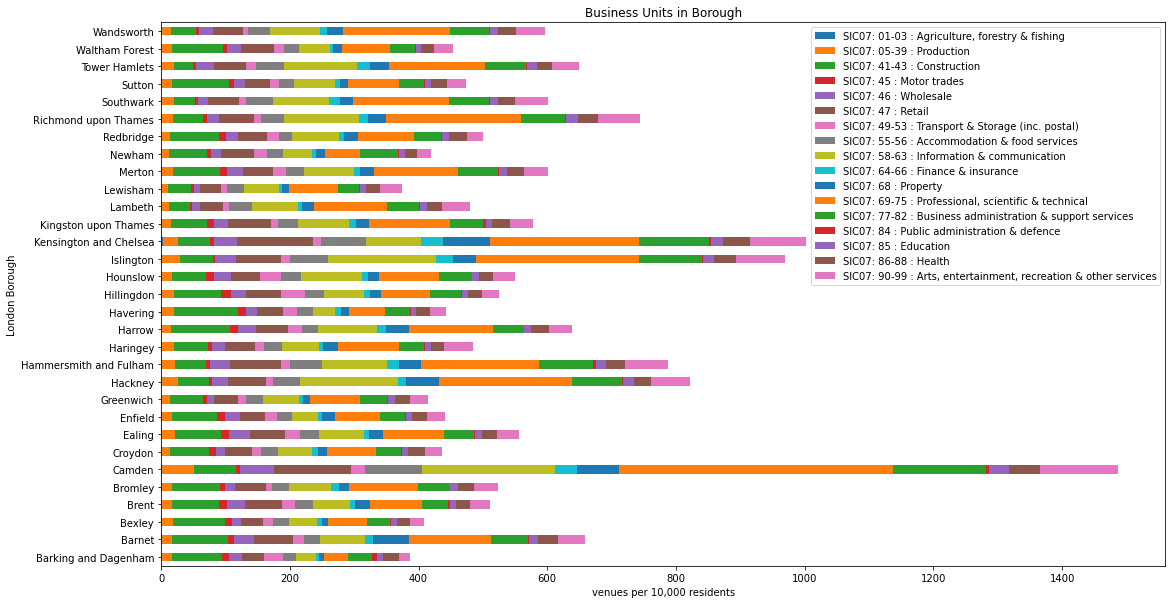

In [48]:
plotData=adjLocalUnits.drop('SIC07: Total', axis=1) #remove total column
plotData=plotData.drop(['City of London', 'Westminster'], axis=0) # remove city of london and westminster
plt.rcParams["figure.figsize"] = (18,10)
plotData.plot(kind='barh', stacked=True) #stacked irrelevant here
plt.title("Business Units in Borough")
plt.xlabel("venues per 10,000 residents")
plt.ylabel("London Borough")
plt.legend()

This shows the volume an profile of businesses varies across each borough

Look at how each industry varies as a percentage of total industry within the borough

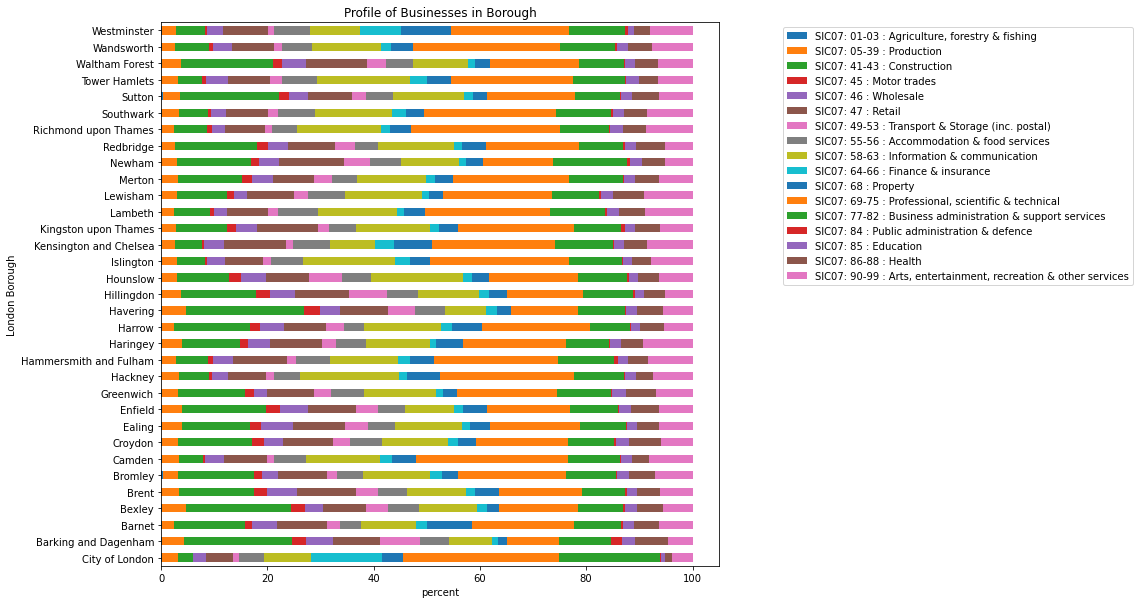

In [68]:
plotData=100*adjLocalUnits.div(adjLocalUnits['SIC07: Total'], axis=0)

plotData.drop('SIC07: Total', axis=1, inplace=True) #remove total column

#plotData=plotData.drop(['City of London', 'Westminster'], axis=0) # remove city of london and westminster
plt.rcParams["figure.figsize"] = (10,10)
plotData.plot(kind='barh', stacked=True) #stacked irrelevant here
plt.title("Profile of Businesses in Borough")
plt.xlabel("percent")
plt.ylabel("London Borough")
plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1))

**Conclusion:** The volume and profile of businesses varies across each London Borough